# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import NeuroDAVIS as nd
import DownstreamAnalysis as DA
from D2toD9 import Convert
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [2]:
dir = 'D:/Research/NeuroDAVIS/Results/2D/NeuroDAVIS/'
X = DS.LoadData('Shape')

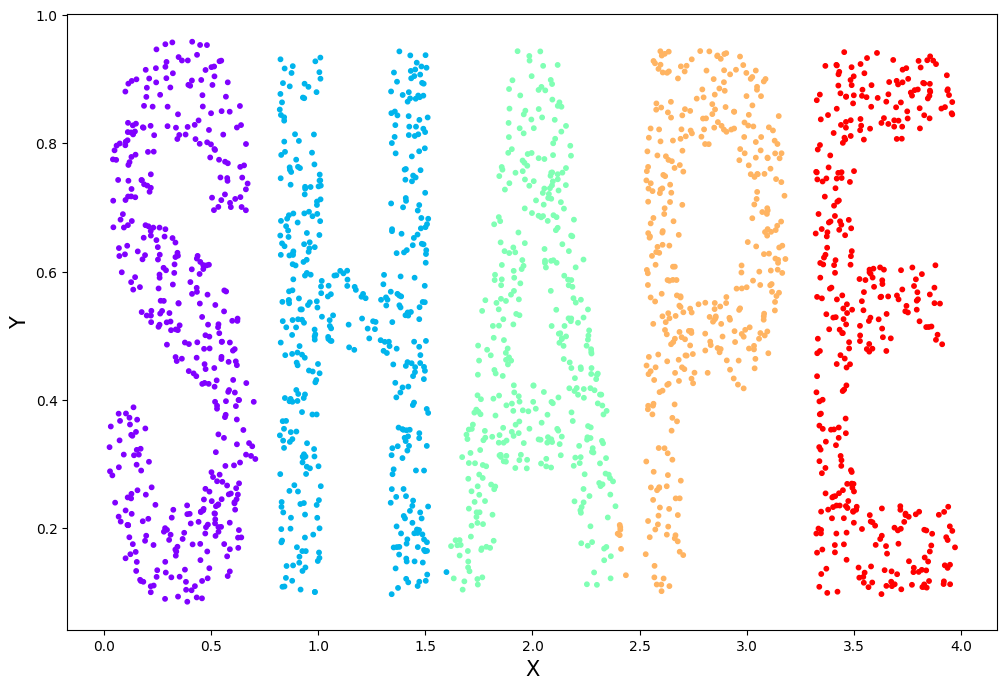

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5),s=10)
plt.xlabel("X", fontsize = 15)
plt.ylabel("Y", fontsize = 15)
#plt.show()
plt.savefig(dir+'Shape.eps', dpi = 300, format = 'eps')

# Applying NeuroDAVIS

In [4]:
data = np.eye(X.shape[0])
neuroDAVIS, Low = nd.NeuroDAVIS(data, X, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[10,6], bs=16, epoch=1000, sd=1, verbose=1)
X_embedding = Low.predict(data)

Epoch 1/1000
125/125 [==============================] - 1s 1ms/step - loss: 1.7720
Epoch 2/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.7880
Epoch 3/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.6612
Epoch 4/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5903
Epoch 5/1000
125/125 [==============================] - 0s 872us/step - loss: 0.5039
Epoch 6/1000
125/125 [==============================] - 0s 942us/step - loss: 0.3759
Epoch 7/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.2176
Epoch 8/1000
125/125 [==============================] - 0s 931us/step - loss: 0.1235
Epoch 9/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0942
Epoch 10/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0849
Epoch 11/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0810
Epoch 12/1000
125/125 [==============================] - 0s 960us/step - 

125/125 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 195/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0255
Epoch 196/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 197/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0248
Epoch 198/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0244
Epoch 199/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0243
Epoch 200/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0248
Epoch 201/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 202/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0255
Epoch 203/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0248
Epoch 204/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0243
Epoch 205/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.

# Plotting the results

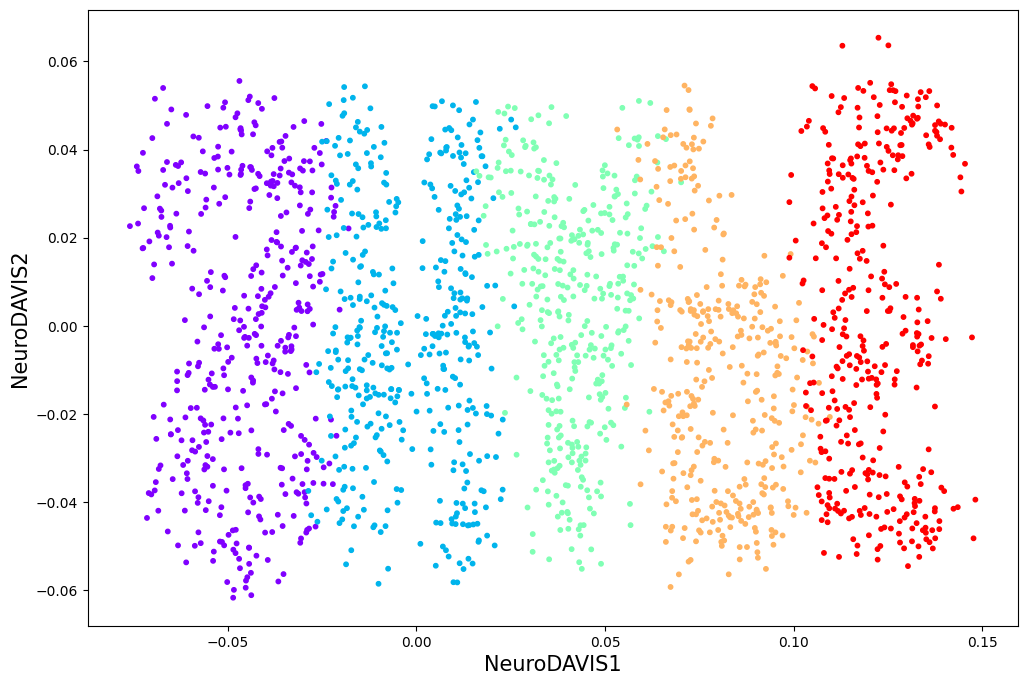

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X_embedding[:,0],X_embedding[:,1],c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5),s=10)
plt.xlabel("NeuroDAVIS1", fontsize=15)
plt.ylabel("NeuroDAVIS2", fontsize=15)
#plt.show()
plt.savefig(dir+'Shape_NeuroDAVIS.eps', dpi = 300, format = 'eps')

# Spearman correlation

In [7]:
iteration = 10
score1 = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    neuroDAVIS, Low = nd.NeuroDAVIS(data, X, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[10,6], bs=16, epoch=500, sd=0, verbose=0)
    X_embedding = Low.predict(data)
    dist_method = np.square(euclidean_distances(X_embedding, X_embedding)).flatten()
    score1.append(DA.correlation(dist_orig, dist_method))
#print(score1)

63/63 [==============================] - 0s 656us/step


# Projecting data into high dimension and applying NeuroDAVIS
Using projection: $(x,y) \rightarrow (x+y,x-y,xy,x^2,y^2,x^2y,xy^2,x^3,y^3)$

In [8]:
X_9D = Convert(X)
neuroDAVIS, Low = nd.NeuroDAVIS(data, X_9D, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[20,15], bs=16, epoch=500, sd=0, verbose=1)
X_embedding = Low.predict(data)

Epoch 1/500
125/125 [==============================] - 1s 1ms/step - loss: 65.7782
Epoch 2/500
125/125 [==============================] - 0s 1ms/step - loss: 52.6834
Epoch 3/500
125/125 [==============================] - 0s 1ms/step - loss: 38.6052
Epoch 4/500
125/125 [==============================] - 0s 1ms/step - loss: 35.7843
Epoch 5/500
125/125 [==============================] - 0s 1ms/step - loss: 34.3741
Epoch 6/500
125/125 [==============================] - 0s 1ms/step - loss: 32.6439
Epoch 7/500
125/125 [==============================] - 0s 1ms/step - loss: 30.2953
Epoch 8/500
125/125 [==============================] - 0s 1ms/step - loss: 26.4530
Epoch 9/500
125/125 [==============================] - 0s 1ms/step - loss: 19.6479
Epoch 10/500
125/125 [==============================] - 0s 1ms/step - loss: 10.7996
Epoch 11/500
125/125 [==============================] - 0s 1ms/step - loss: 4.8102
Epoch 12/500
125/125 [==============================] - 0s 1ms/step - loss: 2.5589
Epo

125/125 [==============================] - 0s 1ms/step - loss: 0.2149
Epoch 197/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2138
Epoch 198/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2144
Epoch 199/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2120
Epoch 200/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2122
Epoch 201/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2115
Epoch 202/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2123
Epoch 203/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2141
Epoch 204/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2178
Epoch 205/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2189
Epoch 206/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2218
Epoch 207/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2152
Epoch 

# Plotting the results

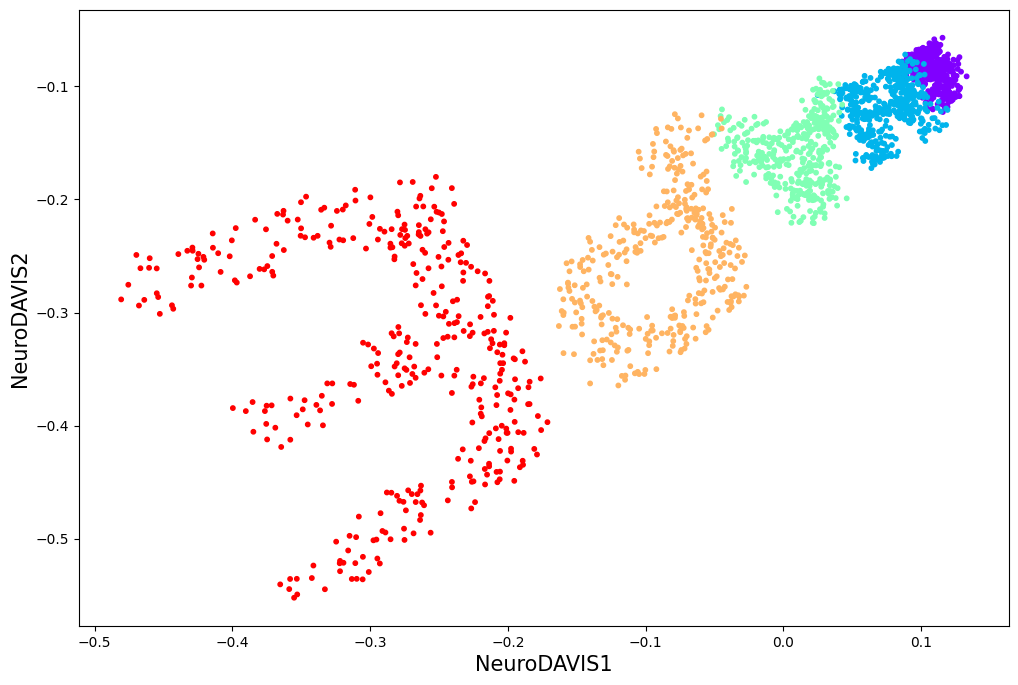

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(X_embedding[:,0],X_embedding[:,1],c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5),s=10)
plt.xlabel("NeuroDAVIS1", fontsize=15)
plt.ylabel("NeuroDAVIS2", fontsize=15)
#plt.show()
plt.savefig(dir+'Shape_NeuroDAVIS_2D_9D_2D.eps', dpi = 300, format = 'eps')

# Spearman correlation

In [10]:
iteration = 10
score2 = []
dist_orig = np.square(euclidean_distances(X_9D, X_9D)).flatten()
for i in range(iteration):
    neuroDAVIS, Low = nd.NeuroDAVIS(data, X_9D, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[20,15], bs=16, epoch=500, sd=0, verbose=0)
    X_embedding = Low.predict(data)
    dist_method = np.square(euclidean_distances(X_embedding, X_embedding)).flatten()
    score2.append(DA.correlation(dist_orig, dist_method))
#print(score2)